

### Recurrent Neural Networks (RNNs) are a type of neural network architecture that is particularly well-suited for tasks involving sequential data. Unlike feedforward neural networks, which process data in fixed-size chunks, RNNs can handle input sequences of arbitrary length.

#### key features of RNNs:

- Recurrent Connections: RNNs have recurrent connections that allow information to persist across different time steps in a sequence. This means that information from previous inputs is considered when processing the current input.

- Shared Parameters: The same set of weights and biases are applied at each time step. This allows the network to use the same computation for different elements of the sequence.

- Time Dependency: RNNs are well-suited for tasks where the order or temporal dependency of data matters, such as time series prediction, language modeling, and speech recognition.

### The SimpleRNN layer processes sequences by iterating through the input sequence elements and maintaining a hidden state that captures information about the previous elements in the sequence.
The RNN in the provided example consists of one layer of SimpleRNN (Recurrent Neural Network) followed by a Dense layer for classification.
## The input to the RNN is a sequence of 28x28 pixels for each image in the MNIST dataset.

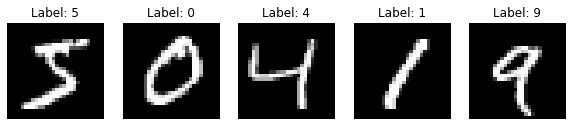

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print a few examples from the dataset
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

In [3]:

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- In model we are setting up a SimpleRNN layer with 32 units and an input shape of (28, 28), where 28 is the number of time steps (pixels along one axis), and 28 is the number of features at each time step (pixels along the other axis)
- After the SimpleRNN layer, a Dense layer is added for the final classification. The Dense layer uses a softmax activation function for multi-class classification.
- We are adding a Dense layer with 10 units (one for each digit) and a softmax activation function for the final classification.

In [4]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(28, 28)))
model.add(Dense(units=10, activation='softmax'))

### The model is trained using categorical crossentropy loss and the Adam optimizer. The training involves adjusting the weights to minimize the difference between the predicted output and the actual labels

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the input data for RNN
train_images_rnn = train_images.reshape((60000, 28, 28))
test_images_rnn = test_images.reshape((10000, 28, 28))

# Train the model
history = model.fit(train_images_rnn, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 13s 16ms/step - loss: 0.2403 - accuracy: 0.9302 - val_loss: 0.2262 - val_accuracy: 0.9352
Epoch 2/10
750/750 [==============================] - 11s 14ms/step - loss: 0.2296 - accuracy: 0.9335 - val_loss: 0.2226 - val_accuracy: 0.9369
Epoch 3/10
750/750 [==============================] - 12s 16ms/step - loss: 0.2179 - accuracy: 0.9372 - val_loss: 0.2597 - val_accuracy: 0.9206
Epoch 4/10
750/750 [==============================] - 12s 17ms/step - loss: 0.2140 - accuracy: 0.9372 - val_loss: 0.1889 - val_accuracy: 0.9467
Epoch 5/10
750/750 [==============================] - 10s 14ms/step - loss: 0.2096 - accuracy: 0.9388 - val_loss: 0.1852 - val_accuracy: 0.9477
Epoch 6/10
750/750 [==============================] - 10s 14ms/step - loss: 0.2019 - accuracy: 0.9414 - val_loss: 0.1884 - val_accuracy: 0.9467
Epoch 7/10
750/750 [==============================] - 10s 14ms/step - loss: 0.1921 - accuracy: 0.9453 - val_loss: 0.1719 - val_accuracy:

In [10]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images_rnn, test_labels)
print('Test accuracy:', test_acc)

# Function to predict and visualize results on new images
def predict_and_visualize(model, images, labels):
    predictions = model.predict(images)
    num_images = len(images)

    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap='gray')
        plt.title(f"Predicted: {np.argmax(predictions[i])}\nTrue: {np.argmax(labels[i])}")
        plt.axis('off')

    plt.show()


313/313 [==============================] - 2s 7ms/step - loss: 0.2304 - accuracy: 0.9347
Test accuracy: 0.9347000122070312


1/1 [==============================] - 0s 41ms/step


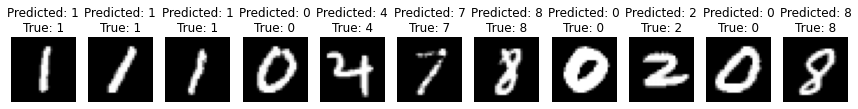

In [9]:
# Choose some random test images for prediction
num_images_to_predict = 11
random_indices = np.random.choice(len(test_images_rnn), num_images_to_predict, replace=False)
images_to_predict = test_images_rnn[random_indices]
labels_to_predict = test_labels[random_indices]

# Predict and visualize the results
predict_and_visualize(model, images_to_predict, labels_to_predict)


### Quick Practic Python code that demonstrates the fundamentals of Recurrent Neural Networks (RNNs) using TensorFlow/Keras. This code implements an RNN to learn a simple sequence and predict the next element in the sequence

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define a simple sequence
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

In [18]:
# Create input and output sequences for training
def create_sequences(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 4  # Number of time steps
X, y = create_sequences(sequence, n_steps)

In [19]:
# Reshape input for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

In [20]:
# Define and compile the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=200, verbose=0)

In [21]:
# Demonstrate prediction
x_input = np.array([0.3, 0.4, 0.5,0.6])  # Input sequence
x_input = x_input.reshape((1, n_steps, 1))  # Reshape for RNN
y_pred = model.predict(x_input, verbose=0)  # Predict next element

print("Input Sequence:", x_input.flatten())
print("Predicted Next Element:", y_pred.flatten())

Input Sequence: [0.3 0.4 0.5 0.6]
Predicted Next Element: [0.7391848]
